In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc("pdf", fonttype=42)

from geoscripts.dz import dz

In [2]:
hf_directory = "~/hawksey/UCD Box/UC Davis/Laserchron/Vasey Hf 2019/"
samples = ['100311-3A','C17069B','V17043A']

paths = [hf_directory+sample+'.csv' for sample in samples]

data = [pd.read_csv(path) for path in paths]

smps = []
for k,df in enumerate(data):
    smp = dz.DZSample(name=samples[k],agedata=df,source='Vasey22')
    smp.calc_bestage(col_238='Age',col_207='Age')
    smps.append(smp)

In [3]:
mayringer_directory = "~/hawksey/UCD Box/UC Davis/Manuscripts/CaucasusDZ/PublishedRawData/Mayringer11.csv"

mayringer_raw = pd.read_csv(mayringer_directory)

# Assume age data for spot 14.2 is equal to spot 14.1 for 345
age_cols = ['238Age','238sig2','207Age','207sig2']

mayringer_raw.loc[45,age_cols] = mayringer_raw.loc[43,age_cols]

names = list(mayringer_raw['Sample'].unique())

msamples = []

for name in names:
    smp_boolean = mayringer_raw.loc[:,'Sample']==name
    data = mayringer_raw.loc[smp_boolean]
    
    sample = dz.DZSample(name=name,agedata=data,source='Mayringer11')
    
    sample.calc_bestage(col_238='238Age',col_207='207Age',
                        err_238='238sig2',err_207='207sig2',err_lev='2sig',
                        filter_disc=False,use_err=True)

    msamples.append(sample)

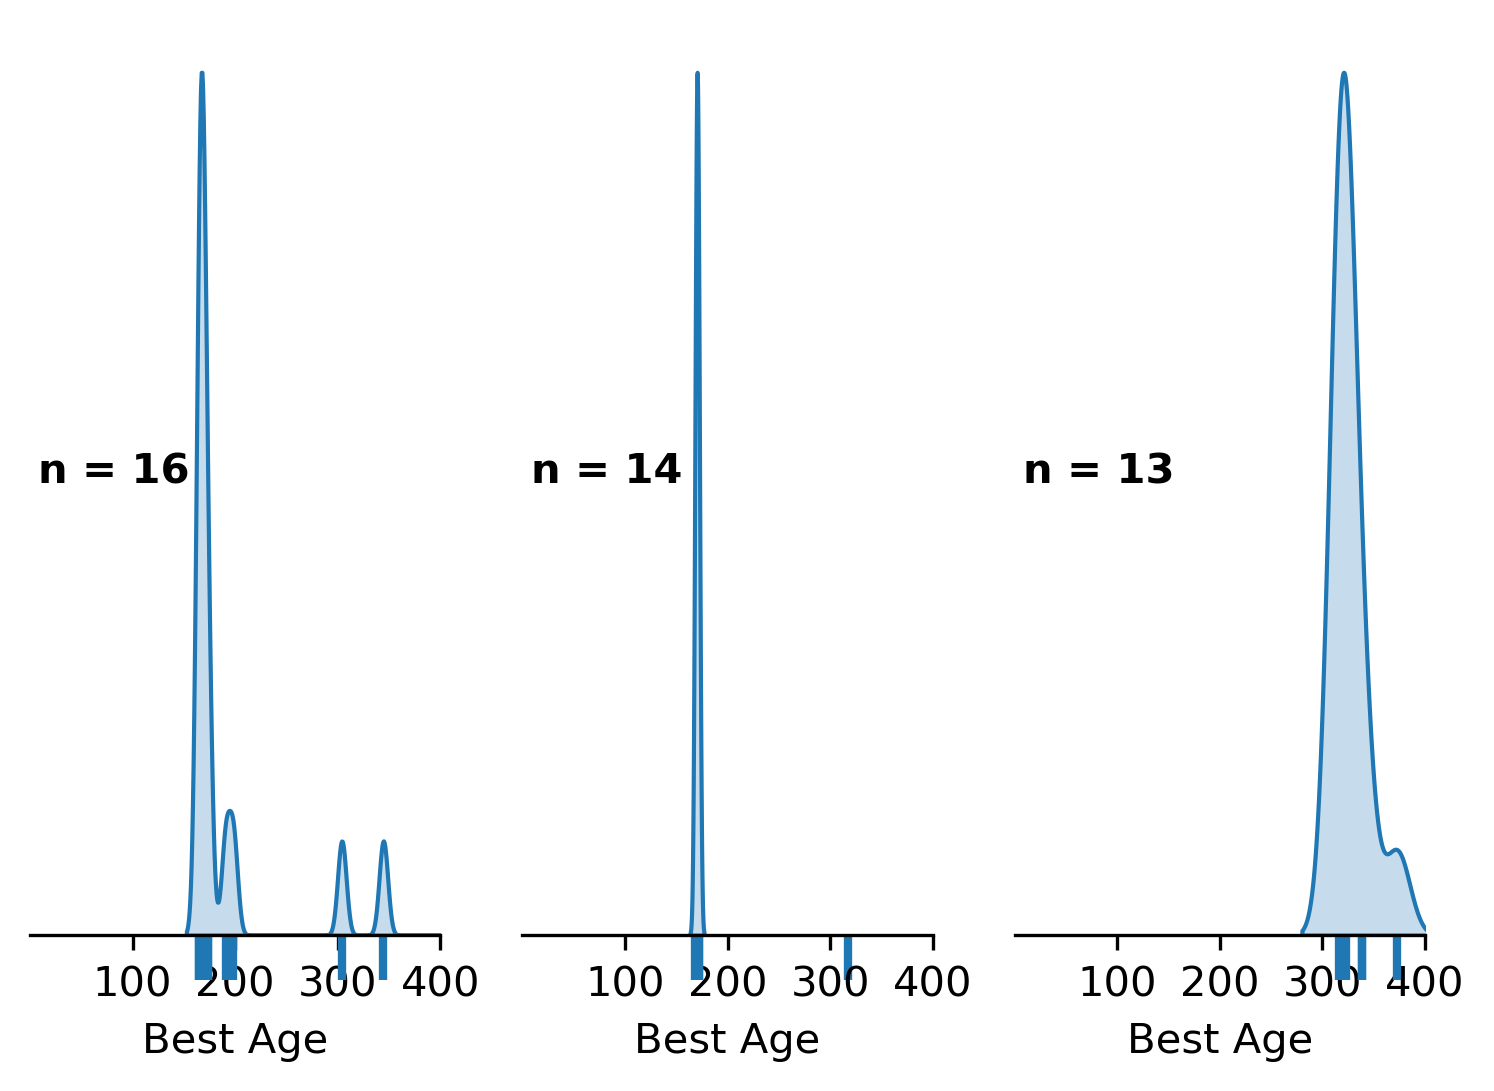

In [4]:
fig,axs = plt.subplots(1,3,dpi=300)

for k,smp in enumerate(smps):
    smp.kde(ax=axs[k],method='vermeesch',log_scale=False)
    axs[k].set_xlim(0,400)

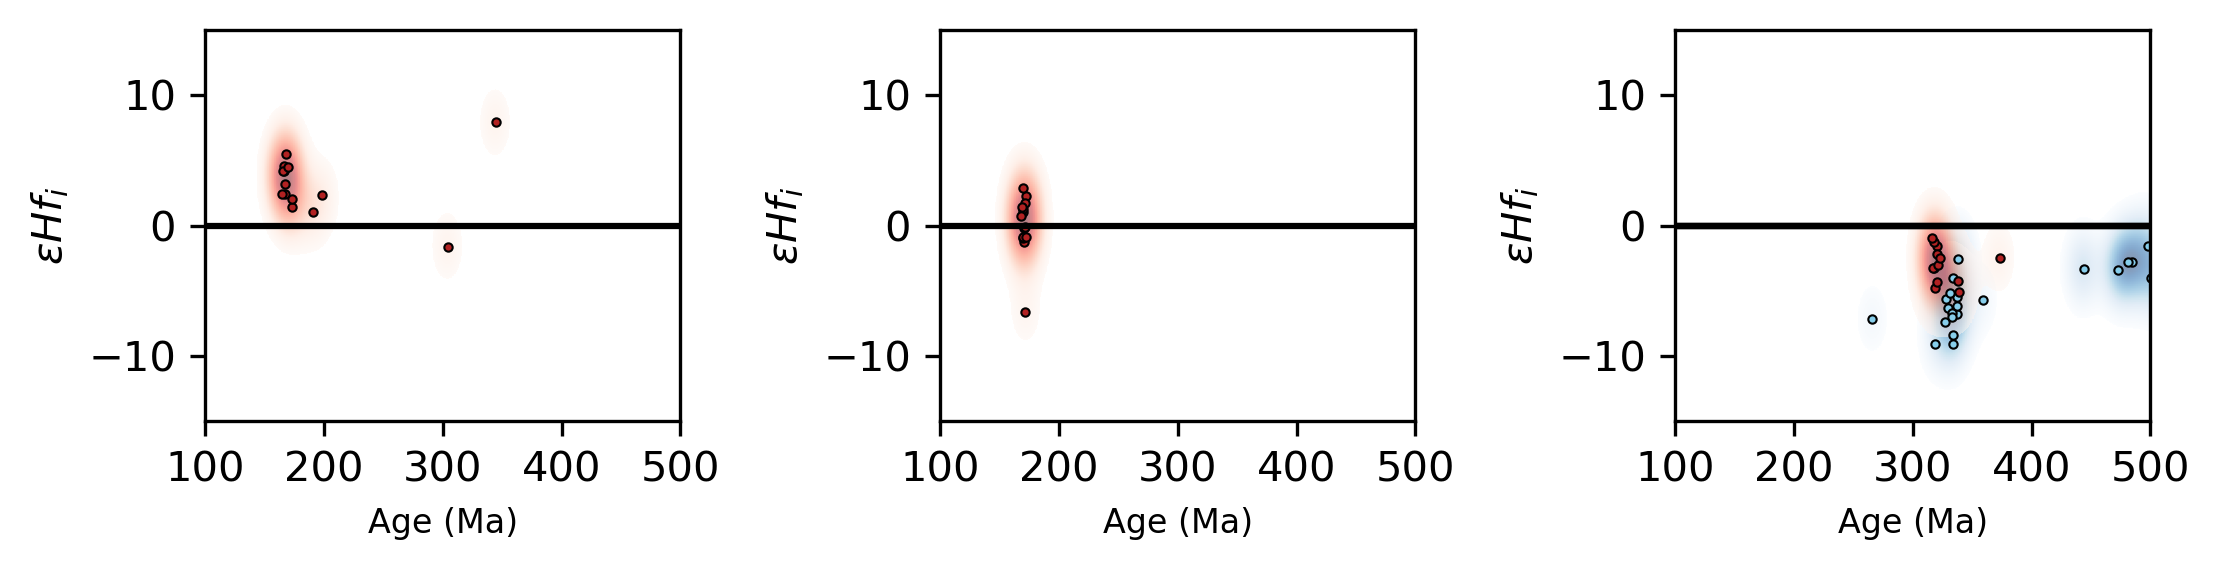

In [20]:
fig,axs = plt.subplots(1,3,dpi=300,figsize=(7.5,2))

for smp in msamples:
        smp.kde_hf('epsHfinit_rep',method=[10,2],cmap='Blues',xlim=(100,500),ylim=(-15,20),ax=axs.flat[2],vmin=0.05,include_ages=True,
    marker_color='skyblue',alpha=0.5)

for k,smp in enumerate(smps):
    smp.kde_hf('Ehf',method=[10,2],cmap='Reds',xlim=(100,500),ylim=(-15,15),ax=axs.flat[k],vmin=0.05,include_ages=True,
    marker_color='firebrick',alpha=0.5)
    axs.flat[k].xaxis.label.set_size(8)
    axs.flat[k].xaxis.label.set_size(8)
    axs.flat[k].set_xticks([100,200,300,400,500],fontsize=6)
    axs.flat[k].set_yticks(np.arange(-10,15,10),fontsize=6)


plt.tight_layout()


In [6]:
from scipy.stats import gaussian_kde

In [7]:
ages = smps[0].bestage
hf = smps[0].agedata['Ehf']

print(ages,hf)

ages_kde = gaussian_kde(ages)
hf_kde = gaussian_kde(hf)

xgrid = np.linspace(0,500,100)
ygrid = np.linspace(-20,15,100)

ages_density = ages_kde(xgrid)
hf_density = hf_kde(ygrid)

0     166.4
1     167.3
2     166.1
3     173.4
4     166.1
5     167.3
6     167.8
7     165.2
8     173.4
9     165.0
10    169.7
11    190.6
12    198.2
13    304.0
14    344.5
15    797.2
Name: Best Age, dtype: float64 0     4.237391
1     2.414891
2     4.212537
3     1.436581
4     4.607301
5     3.223212
6     5.527067
7     4.174203
8     2.070759
9     2.454567
10    4.495866
11    1.067269
12    2.325498
13   -1.610693
14    7.907638
15   -8.784322
Name: Ehf, dtype: float64


In [8]:
import statsmodels.api as sm

In [9]:
sdata = np.vstack([ages,hf]).T
print(sdata.shape)
print(sdata)

print(np.diag([4,2]))

dens_u = sm.nonparametric.KDEMultivariate(data=sdata, var_type='cc', bw=[4,2])


(16, 2)
[[166.4          4.23739103]
 [167.3          2.41489093]
 [166.1          4.21253746]
 [173.4          1.43658138]
 [166.1          4.60730095]
 [167.3          3.22321216]
 [167.8          5.52706692]
 [165.2          4.17420302]
 [173.4          2.07075896]
 [165.           2.45456738]
 [169.7          4.49586649]
 [190.6          1.06726941]
 [198.2          2.32549836]
 [304.          -1.61069254]
 [344.5          7.90763783]
 [797.2         -8.78432234]]
[[4 0]
 [0 2]]


In [10]:
xx,yy = np.meshgrid(xgrid,ygrid)

print(xx)
print(yy)

grid_coords = np.append(xx.reshape(-1,1), yy.reshape(-1,1),axis=1)

print(grid_coords.shape)

z = dens_u.pdf(grid_coords)

print(z.shape)

z = z.reshape(len(ygrid), len(xgrid))

print(z)

[[  0.           5.05050505  10.1010101  ... 489.8989899  494.94949495
  500.        ]
 [  0.           5.05050505  10.1010101  ... 489.8989899  494.94949495
  500.        ]
 [  0.           5.05050505  10.1010101  ... 489.8989899  494.94949495
  500.        ]
 ...
 [  0.           5.05050505  10.1010101  ... 489.8989899  494.94949495
  500.        ]
 [  0.           5.05050505  10.1010101  ... 489.8989899  494.94949495
  500.        ]
 [  0.           5.05050505  10.1010101  ... 489.8989899  494.94949495
  500.        ]]
[[-20.         -20.         -20.         ... -20.         -20.
  -20.        ]
 [-19.64646465 -19.64646465 -19.64646465 ... -19.64646465 -19.64646465
  -19.64646465]
 [-19.29292929 -19.29292929 -19.29292929 ... -19.29292929 -19.29292929
  -19.29292929]
 ...
 [ 14.29292929  14.29292929  14.29292929 ...  14.29292929  14.29292929
   14.29292929]
 [ 14.64646465  14.64646465  14.64646465 ...  14.64646465  14.64646465
   14.64646465]
 [ 15.          15.          15.        

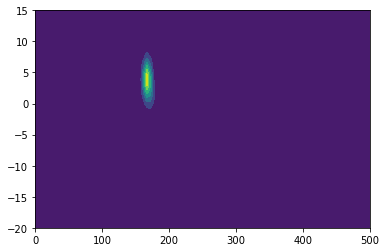

In [11]:
plt.contourf(xgrid,ygrid,z)